### Loading required libraries and dataset

In [1]:
#Load Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex
%matplotlib inline

!pip install haversine
from haversine import haversine, Unit

import warnings
warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",300)
pd.set_option("display.max_columns",300)

In [2]:
# Get the dataset
data = pd.read_csv(r'C:\Users\Prashant B\Desktop\Upgrad\uber.csv')

In [3]:
data.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,27:09.0,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,04:00.0,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,44195482,52:00.0,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,15822268,32:00.0,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,50611056,06:00.0,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [4]:
data.shape

(200000, 9)

In [5]:
#Check the metadata with verbose( Show all the column names)
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


#### 1. Dataset contains 200000 no of rows.
#### 2. 09 no of columns.
#### 3. Number of Float data type - 5
#### 4. Number of int datatype - 2
#### 5. Number of object datatype- 2

In [6]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


### Exploring the dataset and handling missing values

In [7]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
#check the Null values column wise
(data.isnull().sum()/len(data)).sort_values(ascending = False)

dropoff_longitude    0.000005
dropoff_latitude     0.000005
Unnamed: 0           0.000000
key                  0.000000
fare_amount          0.000000
pickup_datetime      0.000000
pickup_longitude     0.000000
pickup_latitude      0.000000
passenger_count      0.000000
dtype: float64

#### We can see that there are no null columns which can be treated

In [9]:
#dropping rows with null values 
data.dropna(inplace=True)

In [10]:
data.shape

(199999, 9)

In [11]:
data[data.duplicated()]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


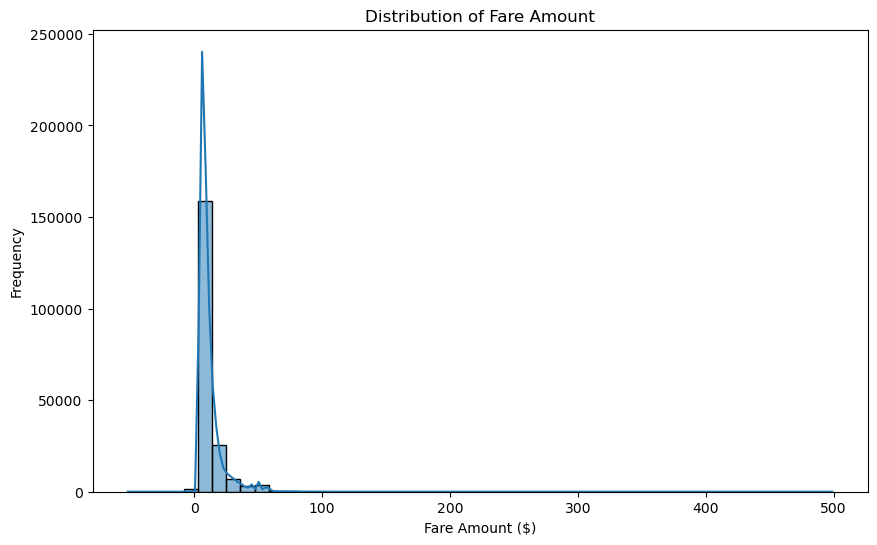

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

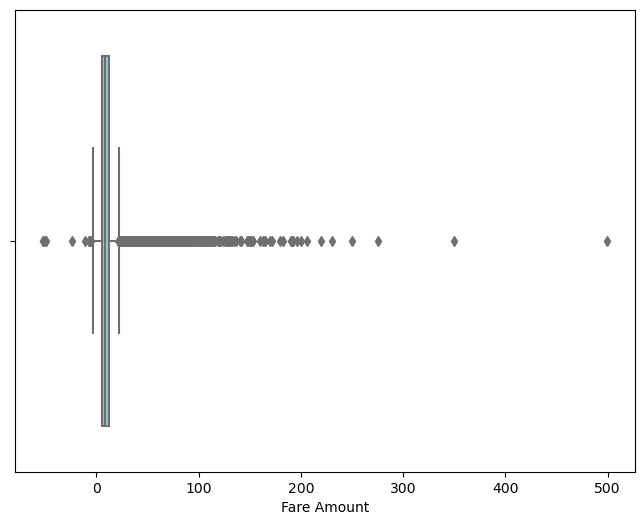

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=data, color='skyblue')
plt.xlabel('Fare Amount')
plt.show()

In [14]:
## Identifying outliers
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
data_clean = data[(data['fare_amount'] >= lower_bound) & (data['fare_amount'] <= upper_bound) & (data['fare_amount'] >= 0)]

# Reset index if needed
data_clean.reset_index(drop=True, inplace=True)


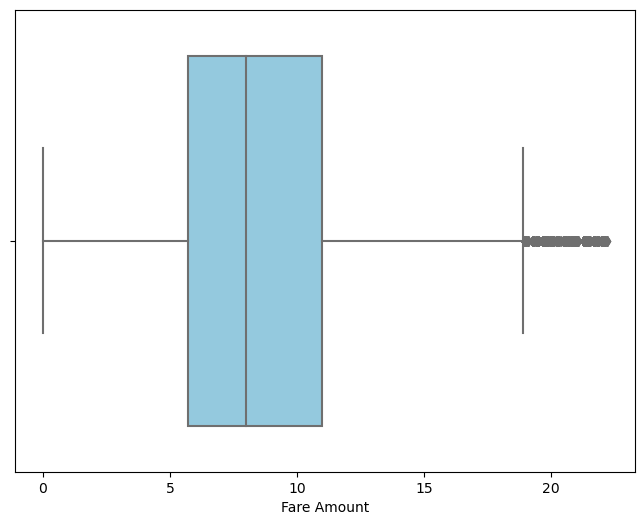

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=data_clean, color='skyblue')
plt.xlabel('Fare Amount')
plt.show()

In [16]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_clean['fare_amount'].quantile(0.25)
Q3 = data_clean['fare_amount'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
data_clean['fare_amount'] = data_clean['fare_amount'].clip(lower=lower_bound, upper=upper_bound)

# Reset index if needed
data_clean.reset_index(drop=True, inplace=True)

In [17]:
data_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


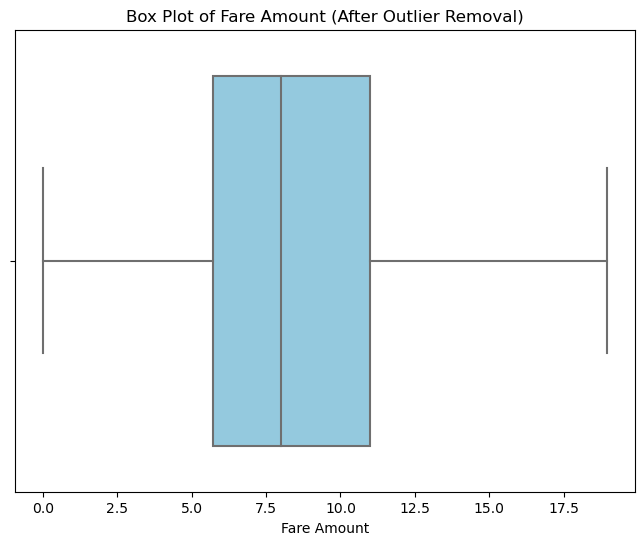

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fare_amount', data=data_clean, color='skyblue')
plt.xlabel('Fare Amount')
plt.title('Box Plot of Fare Amount (After Outlier Removal)')
plt.show()

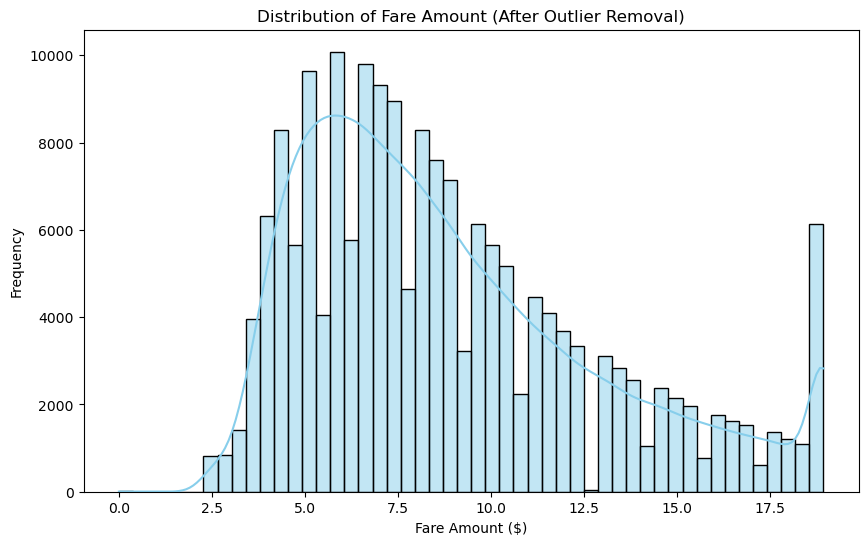

In [19]:
# Re-plot histogram and box plot after outlier removal
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Fare Amount (After Outlier Removal)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

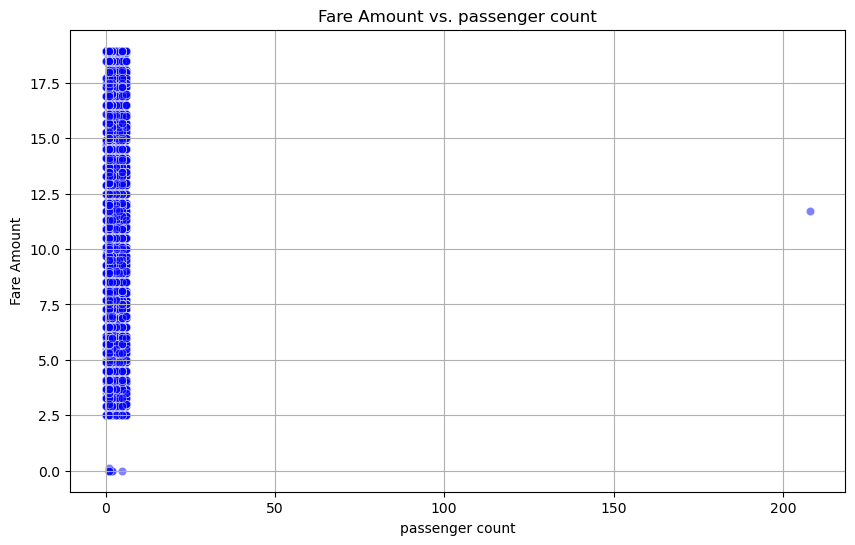

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. passenger count')
plt.xlabel('passenger count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

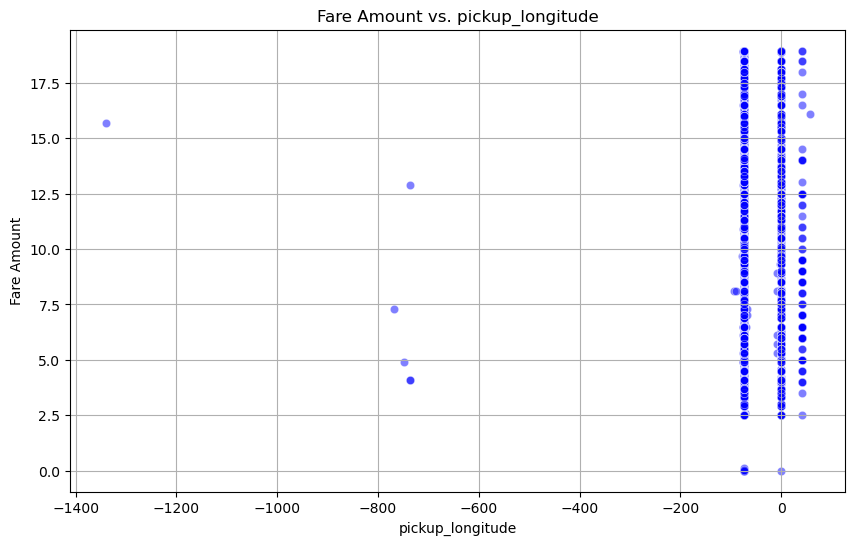

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_longitude', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. pickup_longitude')
plt.xlabel('pickup_longitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

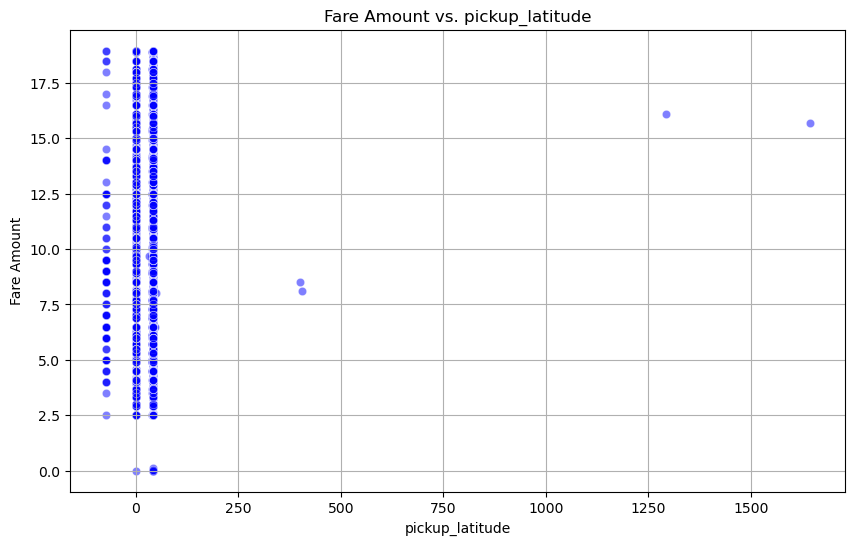

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_latitude', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. pickup_latitude')
plt.xlabel('pickup_latitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

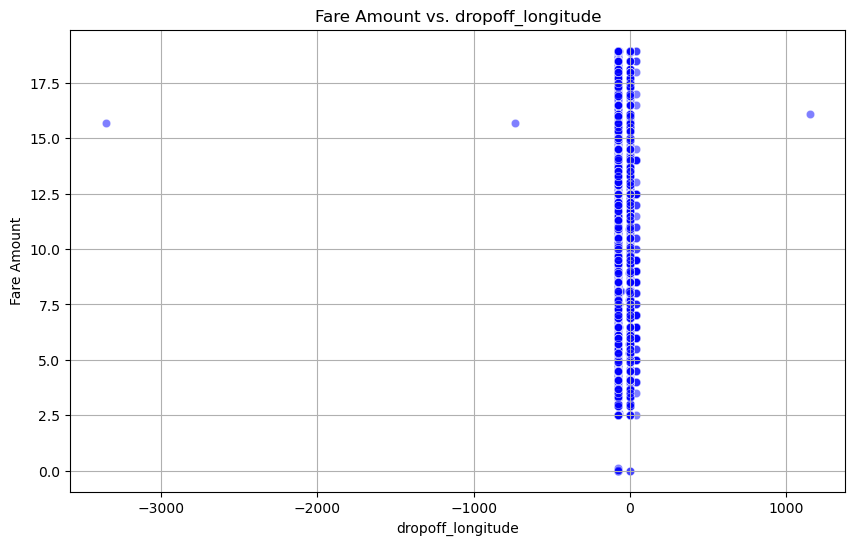

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dropoff_longitude', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. dropoff_longitude')
plt.xlabel('dropoff_longitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

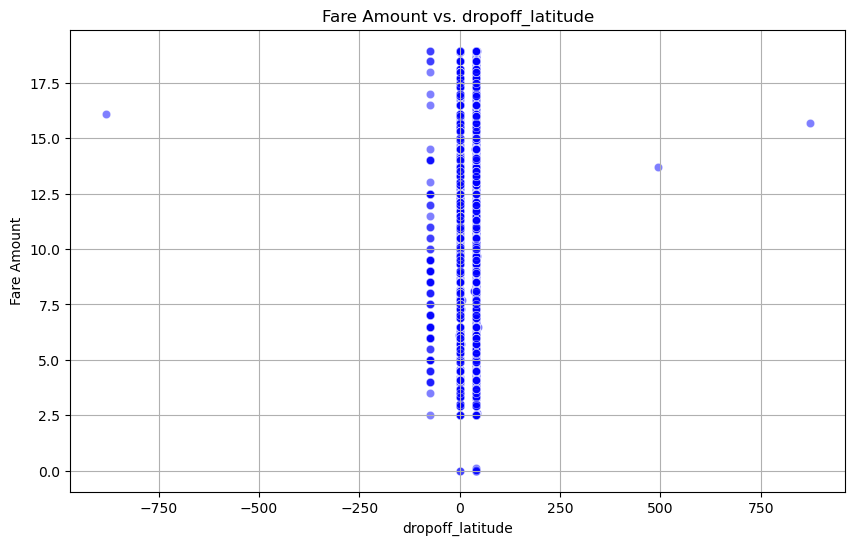

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dropoff_latitude', y='fare_amount', data=data_clean, alpha=0.5, color='blue')
plt.title('Fare Amount vs. dropoff_latitude')
plt.xlabel('dropoff_latitude')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

In [25]:
# Drop rows where passenger count is greater than 50
data_clean = data_clean[data_clean['passenger_count'] <= 50]

# Drop rows where passenger count is 0
data_clean = data_clean[data_clean['passenger_count'] != 0]

# Drop rows where fare amount is less than or equal to zero
data_clean = data_clean[(data_clean['fare_amount'] > 1)]

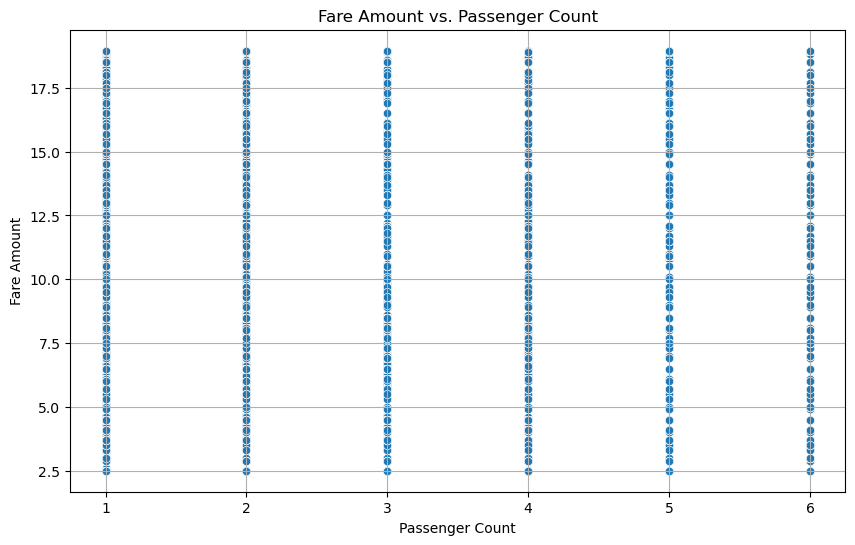

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=data_clean)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()

### Deriving new features based on domain knowledge and insights.

In [27]:
# Filter rows with invalid longitude and latitude values
invalid_picklon_rows = data_clean[(data_clean['pickup_longitude'] < -180) | (data_clean['pickup_longitude'] > 180)]
invalid_picklat_rows=  data_clean[(data_clean['pickup_latitude'] < -90) | (data_clean['pickup_latitude'] > 90)]
invalid_droplon_rows = data_clean[(data_clean['dropoff_longitude'] < -180) | (data_clean['dropoff_longitude'] > 180)]
invalid_droplat_rows=  data_clean[(data_clean['dropoff_latitude'] < -90) | (data_clean['dropoff_latitude'] > 90)]

# Display rows with invalid longitude and latitude values
print("Rows with invalid pickup_longitude values:")
print(invalid_picklon_rows)

print("Rows with invalid pickup_latitude values:")
print(invalid_picklat_rows)

print("Rows with invalid pickup_longitude values:")
print(invalid_droplon_rows)

print("Rows with invalid pickup_latitude values:")
print(invalid_droplat_rows)

Rows with invalid pickup_longitude values:
        Unnamed: 0      key  fare_amount          pickup_datetime  \
4544      42931506  58:00.0          4.9  2012-04-28 00:58:00 UTC   
69322     33249845  22:00.0         15.7  2011-11-05 00:22:00 UTC   
94817     16826862  04:00.0         12.9  2011-10-14 19:04:00 UTC   
131887     9421322  55:00.0          7.3  2009-08-26 11:55:00 UTC   
147787    25264921  19:00.0          4.1  2010-05-12 12:19:00 UTC   
182774    44787414  19:00.0          4.1  2012-07-21 16:19:00 UTC   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
4544         -748.016667        40.739957         -74.003570   
69322       -1340.648410      1644.421482       -3356.666300   
94817        -736.216667        40.767035         -73.982377   
131887       -768.550000        40.757812         -73.997040   
147787       -735.433332        40.740605         -74.006373   
182774       -736.400000        40.774307         -73.982215   

        dropoff_latitude

In [28]:
# Replace invalid longitude and latitude values with NaN
data_clean.loc[(data_clean['pickup_longitude'] < -180) | (data_clean['pickup_longitude'] > 180), 'pickup_longitude'] = np.nan
data_clean.loc[(data_clean['pickup_latitude'] < -90) | (data_clean['pickup_latitude'] > 90), 'pickup_latitude'] = np.nan
data_clean.loc[(data_clean['dropoff_longitude'] < -180) | (data_clean['dropoff_longitude'] > 180), 'dropoff_longitude'] = np.nan
data_clean.loc[(data_clean['dropoff_latitude'] < -90) | (data_clean['dropoff_latitude'] > 90), 'dropoff_latitude'] = np.nan



# Impute NaN values with median longitude and latitude
median_longitude = data_clean['pickup_longitude'].median()
data_clean['pickup_longitude'].fillna(median_longitude, inplace=True)

median_latitude = data_clean['pickup_latitude'].median()
data_clean['pickup_latitude'].fillna(median_latitude, inplace=True)

median_longitude = data_clean['dropoff_longitude'].median()
data_clean['dropoff_longitude'].fillna(median_longitude, inplace=True)

median_latitude = data_clean['dropoff_latitude'].median()
data_clean['dropoff_latitude'].fillna(median_latitude, inplace=True)




In [29]:
# Check if all longitude and latitude values are within the valid range
valid_longitude_range = (data_clean['pickup_longitude'] >= -180) & (data_clean['pickup_longitude'] <= 180)
print("All pickup_longitude values within valid range:", valid_longitude_range.all())

valid_latitude_range = (data_clean['pickup_latitude'] >= -90) & (data_clean['pickup_latitude'] <= 90)
print("All pickup_latitude values within valid range:", valid_latitude_range.all())

valid_longitude_range = (data_clean['dropoff_longitude'] >= -180) & (data_clean['dropoff_longitude'] <= 180)
print("All dropoff_longitude values within valid range:", valid_longitude_range.all())

valid_latitude_range = (data_clean['dropoff_latitude'] >= -90) & (data_clean['dropoff_latitude'] <= 90)
print("All dropoff_latitude values within valid range:", valid_latitude_range.all())


All pickup_longitude values within valid range: True
All pickup_latitude values within valid range: True
All dropoff_longitude values within valid range: True
All dropoff_latitude values within valid range: True


In [30]:
# Calculate trip distance in kilometers
data_clean['distance_km'] = data_clean.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']),
                                                   unit=Unit.KILOMETERS), axis=1)


In [31]:
data_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475456


In [32]:
data_clean.shape

(182144, 10)

In [33]:
data_clean.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
count,1.821440e+05,182144.000000,182144.000000,182144.000000,182144.000000,182144.000000,182144.000000,182144.000000
mean,2.771185e+07,8.897574,-72.522728,39.930933,-72.533195,39.935790,1.686545,17.764418
std,1.601012e+07,4.018287,10.385433,6.058674,10.340438,6.043062,1.303875,355.897765
min,1.000000e+00,2.500000,-93.824668,-74.009697,-75.458979,-74.015750,1.000000,0.000000
25%,1.382478e+07,5.700000,-73.992353,40.735718,-73.991661,40.735290,1.000000,1.162559
50%,2.775597e+07,8.000000,-73.982243,40.752535,-73.980835,40.753200,1.000000,1.961174
75%,4.154583e+07,11.000000,-73.969067,40.766497,-73.966677,40.767375,2.000000,3.282715
max,5.542357e+07,18.950000,57.418457,48.018760,40.831932,45.031598,6.000000,9710.223553


In [34]:
# Outliers in distance
# Calculate the interquartile range (IQR)
Q1 = data_clean['distance_km'].quantile(0.25)
Q3 = data_clean['distance_km'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with distances outside the bounds
data_clean= data_clean[(data_clean['distance_km'] >= lower_bound) & (data_clean['distance_km'] <= upper_bound)]


In [35]:
### Converting pickup_datetime column to datetime format
data_clean['pickup_datetime'] = pd.to_datetime(data_clean['pickup_datetime'])

# Extract hour of day
data_clean['hour_of_day'] = data_clean['pickup_datetime'].dt.hour

# Create time of day categories
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data_clean['time_of_day'] = data_clean['hour_of_day'].apply(get_time_of_day)

In [36]:
# Drop rows with fare amount less than 0
data_clean = data_clean[data_clean['fare_amount'] >= 0]


In [37]:
data_clean.shape

(173900, 12)

In [38]:
data_clean.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,hour_of_day
count,1.739000e+05,173900.000000,173900.000000,173900.000000,173900.000000,173900.000000,173900.000000,173900.000000,173900.000000
mean,2.770664e+07,8.532673,-72.533682,39.931905,-72.532483,39.931974,1.687418,2.219038,13.594083
std,1.601609e+07,3.666077,10.348025,6.059432,10.347865,6.059446,1.304882,1.454688,6.433071
min,4.500000e+01,2.500000,-75.387785,-74.009697,-75.375315,-74.009857,1.000000,0.000000,0.000000
25%,1.380863e+07,5.700000,-73.992235,40.736448,-73.991680,40.736149,1.000000,1.131395,9.000000
50%,2.774377e+07,7.700000,-73.982210,40.752673,-73.981114,40.753209,1.000000,1.876880,14.000000
75%,4.154904e+07,10.500000,-73.969299,40.766368,-73.967773,40.766800,2.000000,3.030473,19.000000
max,5.542357e+07,18.950000,40.808425,45.031653,40.831932,45.031598,6.000000,6.462888,23.000000


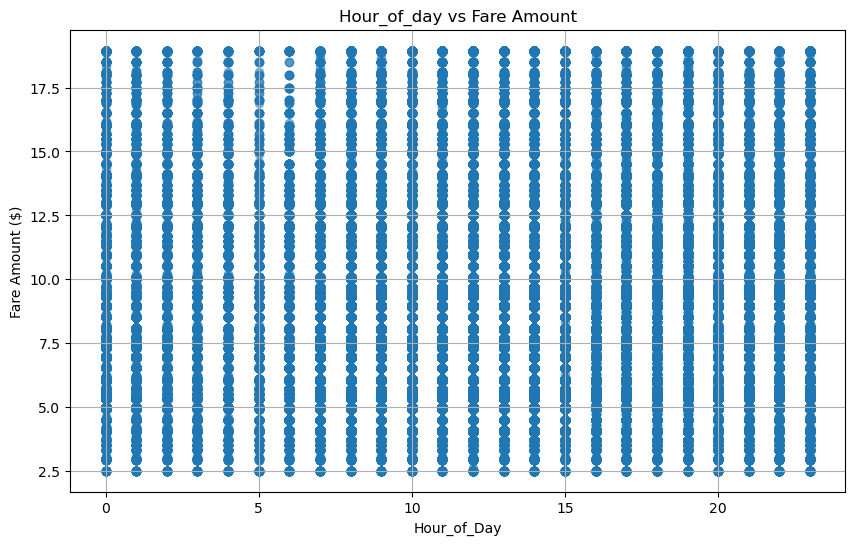

In [39]:
# Plot graph between hour and fare amount
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['hour_of_day'], data_clean['fare_amount'], alpha=0.5)
plt.title('Hour_of_day vs Fare Amount')
plt.xlabel('Hour_of_Day')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


In [40]:
data_clean.drop(columns=['Unnamed: 0', 'key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
data_clean.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,hour_of_day,time_of_day
0,7.5,2015-05-07 19:52:06+00:00,1,1.683325,19,Evening
1,7.7,2009-07-17 20:04:56+00:00,1,2.457593,20,Evening
2,12.9,2009-08-24 21:45:00+00:00,1,5.036384,21,Night
3,5.3,2009-06-26 08:22:21+00:00,3,1.661686,8,Morning
4,16.0,2014-08-28 17:47:00+00:00,5,4.475456,17,Evening


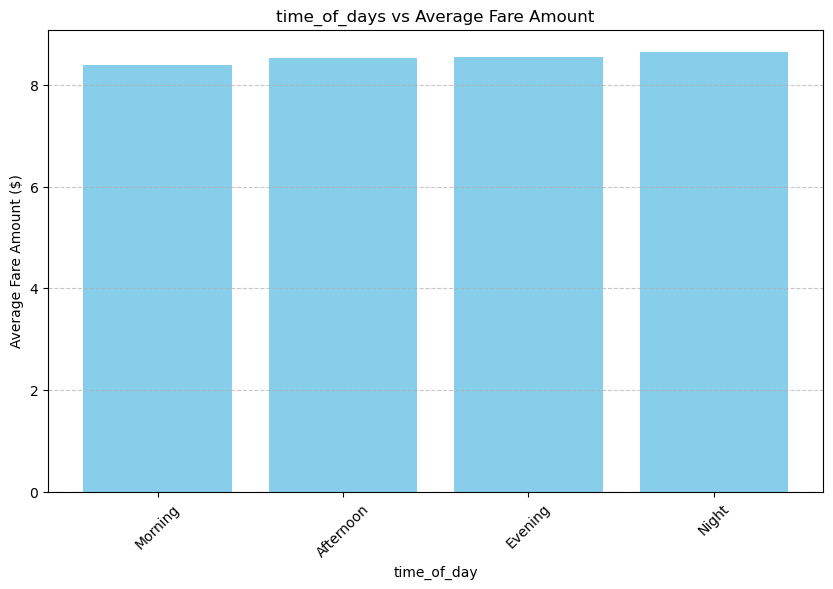

In [41]:
# Grouping by weekdays and calculating mean fare
time_of_day_stats = data_clean.groupby('time_of_day')['fare_amount'].mean().reset_index()

# Sorting by weekday order
time_of_day_order = ['Morning','Afternoon','Evening','Night']
time_of_day_stats['time_of_day'] = pd.Categorical(time_of_day_stats['time_of_day'], categories=time_of_day_order, ordered=True)
time_of_day_stats.sort_values('time_of_day', inplace=True)

# Plotting bar graph for weekdays vs fare
plt.figure(figsize=(10, 6))
plt.bar(time_of_day_stats['time_of_day'], time_of_day_stats['fare_amount'], color='skyblue')
plt.title('time_of_days vs Average Fare Amount')
plt.xlabel('time_of_day')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [42]:
# Drop 'pickup_date' and 'pickup_datetime' columns
data_clean.drop(['pickup_datetime'], axis=1, inplace=True)

# Convert 'weekday' column to category type
data_clean['time_of_day'] = data_clean['time_of_day'].astype('category')

In [43]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173900 entries, 0 to 182826
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   fare_amount      173900 non-null  float64 
 1   passenger_count  173900 non-null  int64   
 2   distance_km      173900 non-null  float64 
 3   hour_of_day      173900 non-null  int32   
 4   time_of_day      173900 non-null  category
dtypes: category(1), float64(2), int32(1), int64(1)
memory usage: 6.1 MB


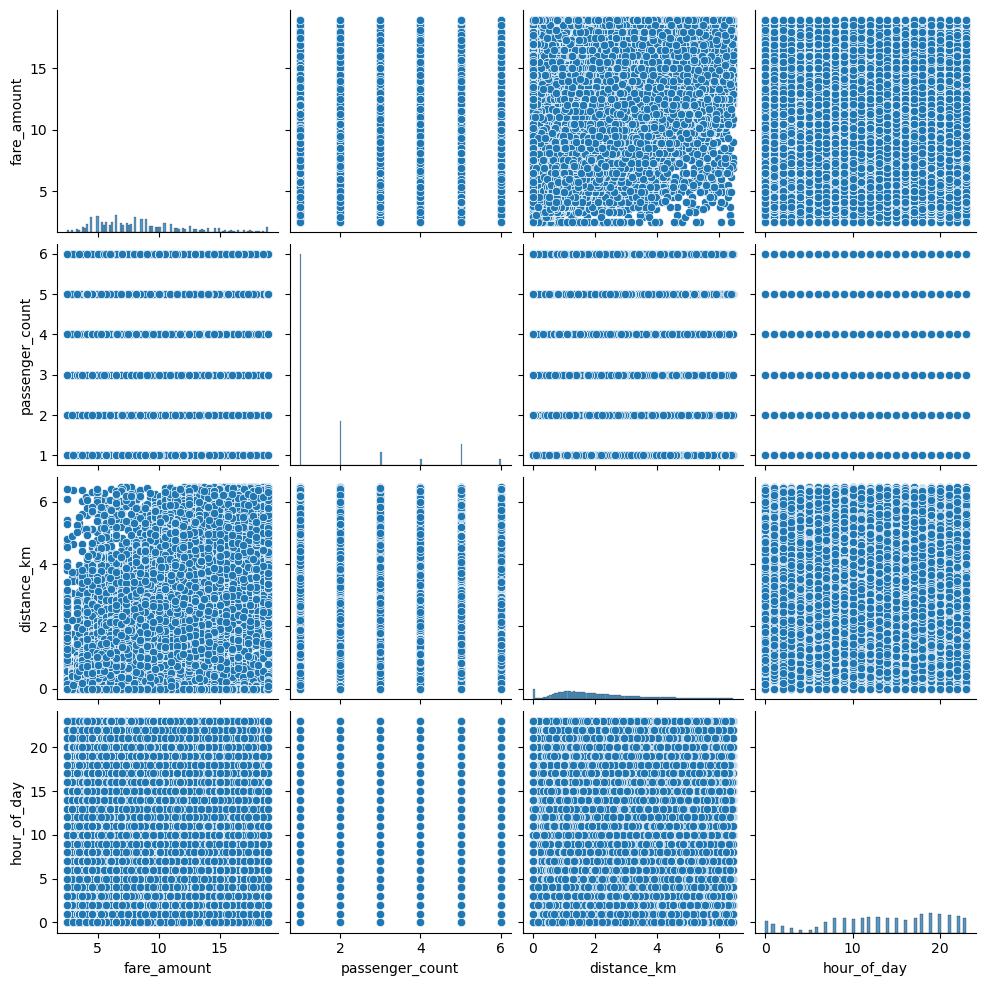

In [44]:
sns.pairplot(data_clean)

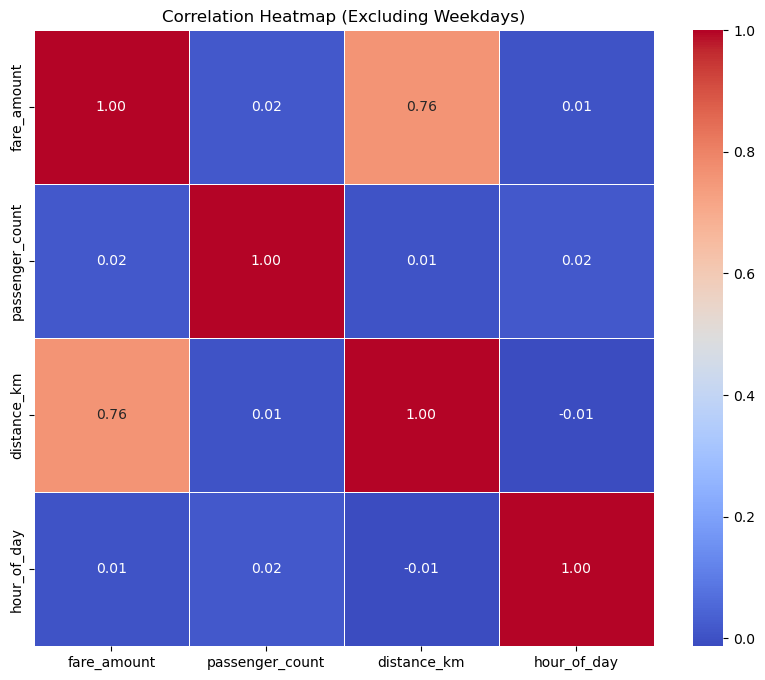

In [45]:
# Selecting only numeric columns for the correlation matrix
numeric_columns = ['fare_amount', 'passenger_count', 'distance_km','hour_of_day']

# Calculating the correlation matrix for numeric columns of the DataFrame df_filtered
correlation_matrix = data_clean[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Weekdays)')
plt.show()


In [46]:
# Create dummy variables for weekdays
time_of_day_dummies = pd.get_dummies(data_clean['time_of_day'])

# Concatenate the dummy variables with the original DataFrame
data_with_dummies = pd.concat([data_clean,time_of_day_dummies], axis=1)

# Drop the original 'weekday' column as it is no longer needed
data_with_dummies.drop('time_of_day', axis=1, inplace=True)


In [47]:
# Convert boolean columns to integers
data_with_dummies['Morning'] = data_with_dummies['Morning'].astype(int)
data_with_dummies['Afternoon'] = data_with_dummies['Afternoon'].astype(int)
data_with_dummies['Evening'] = data_with_dummies['Evening'].astype(int)
data_with_dummies['Night'] = data_with_dummies['Night'].astype(int)

### Splitting the Data into Training and Testing Sets¶

In [48]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
np.random.seed(0)

# Perform train-test split
data_clean_train, data_clean_test = train_test_split(data_with_dummies, train_size=0.7, test_size=0.3, random_state=100)

# Check the shapes of the resulting dataframes
print("Shape of training data:", data_clean_train.shape)
print("Shape of testing data:", data_clean_test.shape)


Shape of training data: (121729, 8)
Shape of testing data: (52170, 8)


In [49]:
from sklearn.preprocessing import StandardScaler

# Columns to be scaled
cols_to_scale = ['fare_amount', 'passenger_count', 'distance_km']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
data_clean_train[cols_to_scale] = scaler.fit_transform(data_clean_train[cols_to_scale])
data_clean_test[cols_to_scale] = scaler.transform(data_clean_test[cols_to_scale])

# Display the scaled data
print(data_clean_train.head())


        fare_amount  passenger_count  distance_km  hour_of_day  Afternoon  \
98257      1.354850        -0.526780    -1.524524            9          0   
73782      1.518472         0.239745    -1.524524           19          0   
87153     -0.826765         0.239745    -0.696922           12          1   
157736     0.264043        -0.526780     1.004959           22          0   
107293    -0.826765        -0.526780    -0.903523            8          0   

        Evening  Morning  Night  
98257         0        1      0  
73782         1        0      0  
87153         0        0      0  
157736        0        0      1  
107293        0        1      0  


In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated
# Compute the correlation matrix
correlation_matrix = data_clean_train.corr()

# Print correlation coefficients with respect to the target variable (fare_amount)
print(correlation_matrix['fare_amount'].sort_values(ascending=False))


fare_amount        1.000000
distance_km        0.759110
Night              0.019691
passenger_count    0.014278
hour_of_day        0.006129
Evening            0.003821
Afternoon          0.001137
Morning           -0.025107
Name: fare_amount, dtype: float64


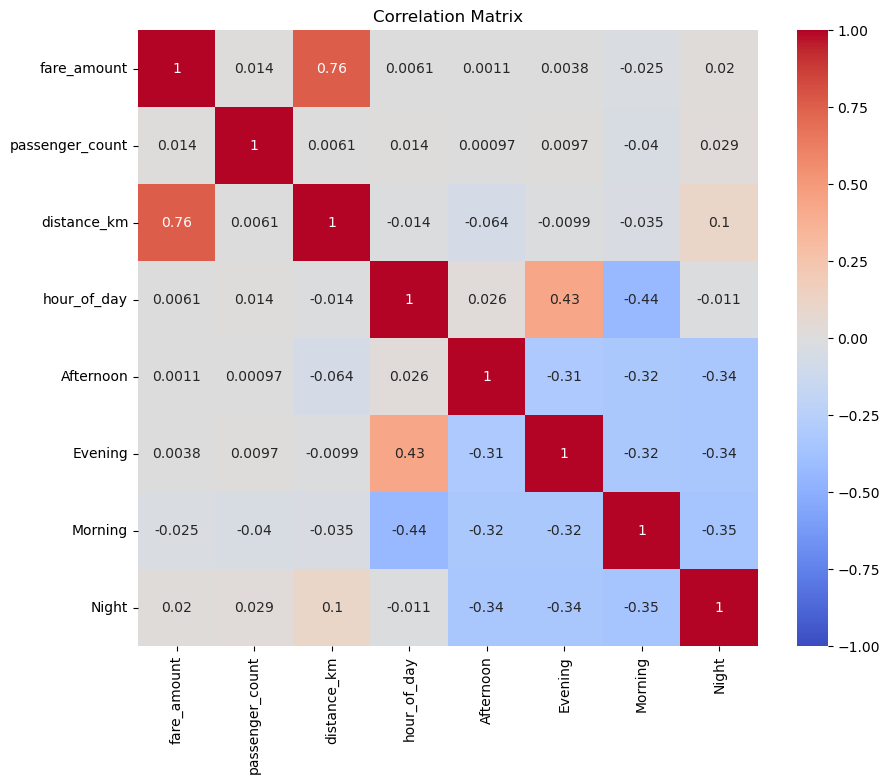

In [51]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Selecting and Training the Regression Model 

In [52]:
y_train = data_clean_train.pop('fare_amount')
X_train = data_clean_train

y_test = data_clean_test.pop('fare_amount')
X_test = data_clean_test

### Predictions and evaluationg model performance 

In [53]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Check the parameters obtained
lr.params

const             -0.026431
passenger_count    0.010890
distance_km        0.766546
hour_of_day        0.002674
Afternoon          0.078361
Evening           -0.002924
Morning            0.006696
Night             -0.108565
dtype: float64

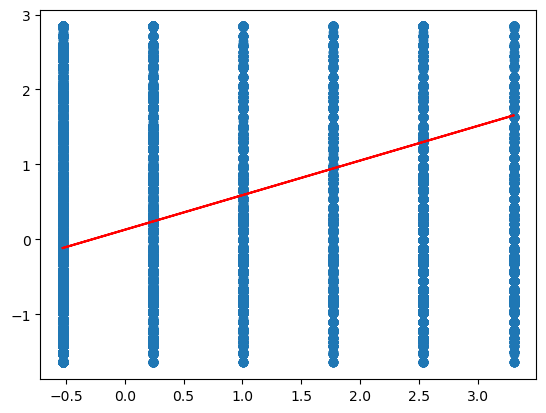

In [55]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [56]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                 2.815e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:02:33   Log-Likelihood:            -1.1976e+05
No. Observations:              121729   AIC:                         2.395e+05
Df Residuals:                  121722   BIC:                         2.396e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0264      0.004     

In [57]:
# Dropping insignificant variables, high p value

X_train = X_train.drop('Morning', axis=1)

In [58]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hour_of_day,4.65
4,Evening,2.68
5,Night,2.04
3,Afternoon,1.95
1,distance_km,1.01
0,passenger_count,1.00


In [60]:
# Build a second fitted model
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [61]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                 2.815e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:02:34   Log-Likelihood:            -1.1976e+05
No. Observations:              121729   AIC:                         2.395e+05
Df Residuals:                  121722   BIC:                         2.396e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0197      0.005     

In [62]:
# Dropping insignificant variables, high p value

X_train= X_train.drop('Evening', axis=1)

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hour_of_day,1.73
4,Night,1.39
3,Afternoon,1.35
1,distance_km,1.01
0,passenger_count,1.00


In [64]:
# Build a third fitted model
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
##Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                 3.378e+04
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:02:34   Log-Likelihood:            -1.1976e+05
No. Observations:              121729   AIC:                         2.395e+05
Df Residuals:                  121723   BIC:                         2.396e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0207      0.005     

### Residual Analysis of the train data

In [66]:
y_train_price = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

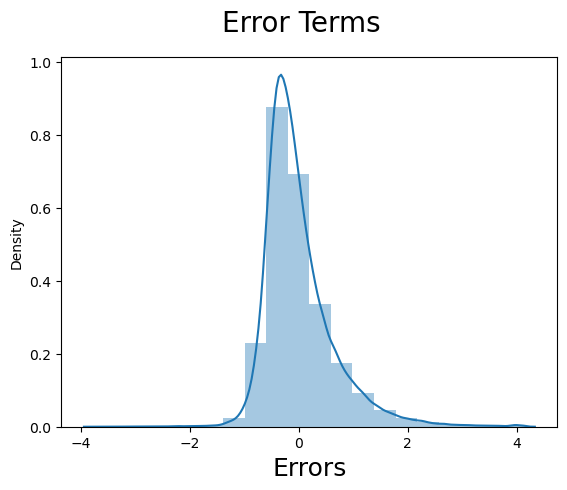

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Errors are now equally distributed

In [68]:
data_clean_test.describe()

,passenger_count,distance_km,hour_of_day,Afternoon,Evening,Morning,Night
count,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000,52170.000000
mean,0.000443,0.001756,13.568200,0.242783,0.234138,0.254361,0.268718
std,1.000727,0.999159,6.413311,0.428769,0.423463,0.435505,0.443297
min,-0.526780,-1.524524,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.526780,-0.745936,9.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.526780,-0.234243,14.000000,0.000000,0.000000,0.000000,0.000000
75%,0.239745,0.561258,19.000000,0.000000,0.000000,1.000000,1.000000
max,3.305845,2.916729,23.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
data_clean_train.describe()

,passenger_count,distance_km,hour_of_day,Afternoon,Evening,Morning,Night
count,1.217290e+05,1.217290e+05,121729.000000,121729.000000,121729.000000,121729.000000,121729.000000
mean,-2.489518e-17,-2.883521e-17,13.605123,0.238612,0.237782,0.250729,0.272877
std,1.000004e+00,1.000004e+00,6.441516,0.426237,0.425727,0.433435,0.445440
min,-5.267801e-01,-1.524524e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.267801e-01,-7.475505e-01,9.000000,0.000000,0.000000,0.000000,0.000000
50%,-5.267801e-01,-2.347337e-01,14.000000,0.000000,0.000000,0.000000,0.000000
75%,2.397449e-01,5.565452e-01,19.000000,0.000000,0.000000,1.000000,1.000000
max,3.305845e+00,2.917144e+00,23.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Adding constant variable to test dataframe
X_test_m3 = sm.add_constant(X_test)

In [71]:
# Creating X_test_m3 dataframe by dropping variables from X_test_m3

X_test_m3 = X_test_m3.drop('Evening', axis = 1)
X_test_m3 = X_test_m3.drop('Night', axis = 1)

In [72]:
num_coeffs = len(lr_3.params)
print("Number of coefficients:", num_coeffs) 

Number of coefficients: 6


In [73]:
print("X_test_m3 shape:", X_test_m3.shape)

X_test_m3 shape: (52170, 6)


In [74]:
# Making predictions using the fourth model

y_pred_m3 = lr_3.predict(X_test_m3)

Text(0, 0.5, 'y_pred')

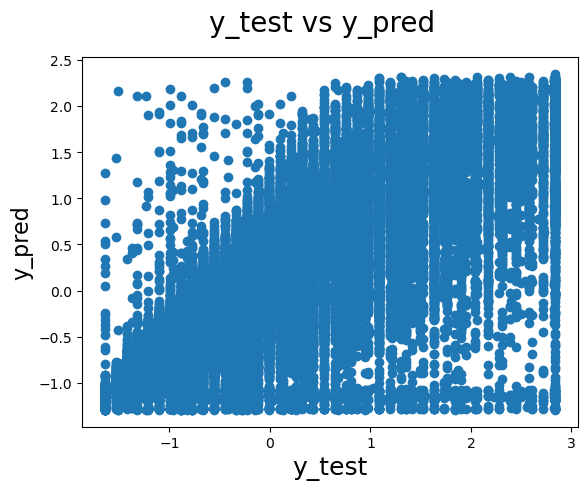

In [75]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m3)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [76]:
from sklearn.metrics import mean_squared_error

dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_m3))
print("Root Mean Squared Error (RMSE):", dt_rmse)

Root Mean Squared Error (RMSE): 0.6534304927921093
